# Overview of this jupyter notebook

1. Load the dataframes
<br>1.1 padding dataframes with zeros
2. Feature Engineering with tsfresh
<br>2.1 Preprocess Data into a dataframe to fulfill the requirement of tsfresh
<br>2.2 Extract features from dataframe
<br>2.3 Split feature in train/test and create label for each
<br>2.4 Create relevance_table based on the p-values
3. Save feature, label and relevance_table


In [1]:
import pandas as pd
import numpy as np
import tsfresh as ts
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm.notebook import tqdm_notebook as tq
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
import json
import random
import pickle
import importlib
from library import faps_color as fapsc        # this module contains the color combination of FAPS Institute
from library import etl_helper as etl   # this module contains functions that load, visualize and save the data
print(importlib.reload(fapsc))
print(importlib.reload(etl))

<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\faps_color.py'>
<module 'library.etl_helper' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. MA_FAPS\\04_Code\\library\\etl_helper.py'>


# 1. Load the dataframes

In [3]:
classes = ['0_in_ordnung',
           '1_kleine_durchgangsbohrung',
           '2_versetzte_fuegepartner',
           '3_unebene_fuegeflaeche',
           '4_span_im_gewinde',
           '5_verschmutzte_schraube',
           '6_fremdkoerper_am_gewindeende',
           '7_beschaedigte_schraube']

In [4]:
df0 = pd.read_pickle("dataframes/df0_v2.pkl")
df1 = pd.read_pickle("dataframes/df1_v2.pkl")
df2 = pd.read_pickle("dataframes/df2_v2.pkl")
df3 = pd.read_pickle("dataframes/df3_v2.pkl")
df4 = pd.read_pickle("dataframes/df4_v2.pkl")
df5 = pd.read_pickle("dataframes/df5_v2.pkl")
df6 = pd.read_pickle("dataframes/df6_v2.pkl")
df7 = pd.read_pickle("dataframes/df7_v2.pkl")

In [5]:
df16 = pd.read_pickle("dataframes/df16_v2.pkl")
df24 = pd.read_pickle("dataframes/df24_v2.pkl")
df27 = pd.read_pickle("dataframes/df27_v2.pkl")
df35 = pd.read_pickle("dataframes/df35_v2.pkl")
df37 = pd.read_pickle("dataframes/df37_v2.pkl")
df267 = pd.read_pickle("dataframes/df267_v2.pkl")
df357 = pd.read_pickle("dataframes/df357_v2.pkl")

In [6]:
df0.shape

(775, 800)

In [7]:
df0

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.38080,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
771,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.20160,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
772,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
773,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [8]:
dfs = {"df0":df0, "df1":df1, "df2":df2, "df3":df3, "df4":df4, "df5":df5, "df6":df6, "df7":df7,
       "df16":df16, "df24":df24, "df27":df27, "df35":df35, "df37":df37, "df267":df267, "df357":df357}

In [9]:
for i in dfs:
    print(f"length of {i}: {len(dfs[i])}")

length of df0: 775
length of df1: 931
length of df2: 812
length of df3: 697
length of df4: 803
length of df5: 766
length of df6: 743
length of df7: 748
length of df16: 877
length of df24: 816
length of df27: 774
length of df35: 728
length of df37: 716
length of df267: 778
length of df357: 729


In [10]:
tot_nr_curves = []

for i in dfs:
    print(f"{i} number of curves: {len(dfs[i].columns)}")
    tot_nr_curves.append(len(dfs[i].columns))
    
print(f"tot_nr_curves: {sum(tot_nr_curves)}")

df0 number of curves: 800
df1 number of curves: 200
df2 number of curves: 200
df3 number of curves: 200
df4 number of curves: 200
df5 number of curves: 200
df6 number of curves: 200
df7 number of curves: 200
df16 number of curves: 100
df24 number of curves: 100
df27 number of curves: 100
df35 number of curves: 100
df37 number of curves: 100
df267 number of curves: 100
df357 number of curves: 100
tot_nr_curves: 2900


In [11]:
tot_nr_curves

[800, 200, 200, 200, 200, 200, 200, 200, 100, 100, 100, 100, 100, 100, 100]

In [12]:
class_sector = np.cumsum(tot_nr_curves)
class_sector

array([ 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2300, 2400, 2500,
       2600, 2700, 2800, 2900], dtype=int32)

## 1.1 padding dataframes with zeros

In [13]:
def zero_padding(df, len_curve):
    
    to_pad = len_curve - len(df)
    zeros = np.zeros(to_pad*len(df.columns)).reshape(to_pad, len(df.columns))
    df_zeros = pd.DataFrame(zeros)    
    df_padded = df.append(df_zeros)
    df_padded = df_padded.reset_index(drop=True)
    
    return df_padded

In [14]:
def pad_df(df, len_curve=920):
    
    if len(df)>len_curve:
        print(f"this dataframe has a length of {len(df)}")
    else:
        df_padded = zero_padding(df, len_curve)
        print(df_padded.shape)
        return df_padded

In [15]:
df0p = pad_df(df0)
df1p = df1[:920]
df2p = pad_df(df2)
df3p = pad_df(df3)
df4p = pad_df(df4)
df5p = pad_df(df5)
df6p = pad_df(df6)
df7p = pad_df(df7)

df1p.shape

(920, 800)
(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)
(920, 200)


(920, 200)

In [16]:
df16p = pad_df(df16)
df24p = pad_df(df24)
df27p = pad_df(df27)
df35p = pad_df(df35)
df37p = pad_df(df37)
df267p = pad_df(df267)
df357p = pad_df(df357)

(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)
(920, 100)


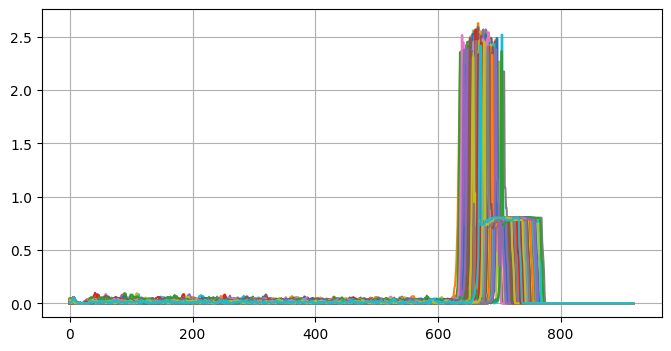

In [17]:
plt.figure(figsize=(8,4))
plt.plot(df0p)
plt.grid()
plt.show()

In [35]:
df0p

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.03136,0.00896
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00896,0.00896,0.00000,0.01344,0.00448,0.00448,0.02688,0.00896
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.00896,0.00896,0.00000,0.00448,0.00448,0.01792,0.00896,0.01344,0.00896,0.01344
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00448,0.01344,0.00896,0.01344,0.00448,0.01344
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.00448,0.00896,0.00000,0.00448,0.00896,0.01792,0.00896,0.01792,0.00896,0.01792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


# 2. Feature Engineering with tsfresh

## 2.1 Preprocess Data into a dataframe to fulfill the requirement of tsfresh 

In [25]:
dfcon = pd.concat([df0p, df1p, df2p, df3p, df4p, df5p, df6p, df7p,
                   df16p, df24p, df27p, df35p, df37p, df267p, df357p], axis=1, ignore_index=True)
dfcon

,0,1,2,3,4,5,6,7,8,9,...,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899
0,0.00448,0.00896,0.00448,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00448,0.00000,0.02240,0.00000,0.03136,0.01344,0.02688,0.02240
1,0.00448,0.00896,0.00000,0.01792,0.01344,0.00896,0.01792,0.02240,0.02688,0.03136,...,0.01792,0.02688,0.00448,0.00000,0.02240,0.00000,0.02688,0.01344,0.02688,0.02240
2,0.00896,0.00896,0.00000,0.01792,0.00896,0.00896,0.00896,0.00448,0.01792,0.00896,...,0.01792,0.01792,0.00896,0.00000,0.00448,0.00448,0.00896,0.01344,0.01792,0.00896
3,0.00896,0.01344,0.00000,0.00896,0.00000,0.00896,0.00000,0.00000,0.01344,0.00000,...,0.00448,0.00448,0.00448,0.00448,0.00000,0.00000,0.00448,0.00896,0.00896,0.00448
4,0.01344,0.01792,0.00000,0.01792,0.00896,0.01344,0.00896,0.00448,0.01792,0.00896,...,0.01792,0.01792,0.00896,0.00448,0.00000,0.00896,0.00896,0.01792,0.01792,0.01344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
916,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
917,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
918,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [26]:
len_curve = 920
torque = pd.Series()
ids = np.array([])
time = np.array([])

for col in tq(dfcon):
    torque = pd.concat([torque, dfcon[col]], axis=0)

    ids = np.concatenate((ids, (np.zeros(len_curve)+col)), axis=0)
    
    time = np.concatenate((time, etl.set_time(dfcon[col])), axis=0)
    

  0%|          | 0/920 [00:00<?, ?it/s]

In [27]:
ids.shape, time.shape, torque.shape

((2668000,), (2668000,), (2668000,))

In [28]:
ids[900:2000]

array([0., 0., 0., ..., 2., 2., 2.])

In [30]:
df_ts = pd.DataFrame({'id':ids, 'time':time, 'torque':torque})
df_ts = df_ts.reset_index(drop=True)
df_ts = df_ts.astype({'id': int})
df_ts

,id,time,torque
0,0,0.0000,0.00448
1,0,0.0035,0.00448
2,0,0.0070,0.00896
3,0,0.0105,0.00896
4,0,0.0140,0.01344
...,...,...,...
2667995,2899,3.2025,0.00000
2667996,2899,3.2060,0.00000
2667997,2899,3.2095,0.00000
2667998,2899,3.2130,0.00000


In [42]:
#df_ts.to_pickle(f"dataframes/df_ts_v2.4.pkl")

## 2.2 Extract features from dataframe

In [43]:
from tsfresh import extract_features

extracted_features = extract_features(df_ts, column_id='id', column_sort='time')

Feature Extraction: 100%|█████████████████████████████████████████████████████████████| 10/10 [24:59<00:00, 150.00s/it]


In [44]:
extracted_features

,torque__variance_larger_than_standard_deviation,torque__has_duplicate_max,torque__has_duplicate_min,torque__has_duplicate,torque__sum_values,torque__abs_energy,torque__mean_abs_change,torque__mean_change,torque__mean_second_derivative_central,torque__median,...,torque__permutation_entropy__dimension_6__tau_1,torque__permutation_entropy__dimension_7__tau_1,torque__query_similarity_count__query_None__threshold_0.0,"torque__matrix_profile__feature_""min""__threshold_0.98","torque__matrix_profile__feature_""max""__threshold_0.98","torque__matrix_profile__feature_""mean""__threshold_0.98","torque__matrix_profile__feature_""median""__threshold_0.98","torque__matrix_profile__feature_""25""__threshold_0.98","torque__matrix_profile__feature_""75""__threshold_0.98",torque__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,1.0,1.0,63.40992,54.176914,0.008809,-0.000005,0.000000,0.00448,...,4.173539,4.816476,NaN,11.375256,17.010489,15.171182,15.166990,14.751558,15.648558,1.41696
1,0.0,1.0,1.0,1.0,64.90176,57.459006,0.009477,-0.000010,0.000000,0.00448,...,4.154236,4.780594,NaN,12.448273,18.285585,14.907301,14.582159,14.177267,15.444345,1.51296
2,0.0,1.0,1.0,1.0,68.41856,54.515943,0.009433,-0.000005,0.000002,0.01344,...,4.400997,5.014247,NaN,12.866001,15.695793,14.589930,14.684597,14.293391,14.977362,1.41120
3,0.0,1.0,1.0,1.0,69.10400,55.229586,0.009672,-0.000019,0.000000,0.01344,...,4.436576,5.106962,NaN,11.539402,15.637652,13.209206,13.109538,12.470986,13.632707,1.43872
4,0.0,1.0,1.0,1.0,67.07904,53.750478,0.009560,-0.000015,0.000000,0.00896,...,4.413192,5.073057,NaN,12.201857,16.528558,13.820900,13.445274,12.945645,14.601706,1.37792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.0,1.0,1.0,1.0,206.94464,121.339316,0.008746,0.000000,0.000000,0.05376,...,3.786215,4.332423,NaN,4.469671,18.249324,10.751682,10.705894,6.088590,14.554048,1.52640
2896,0.0,0.0,1.0,1.0,119.49504,65.344426,0.008321,-0.000034,0.000002,0.07168,...,3.891240,4.388360,NaN,7.716249,17.336798,12.807311,12.372016,10.798683,15.058598,1.58720
2897,0.0,1.0,1.0,1.0,209.82080,121.787609,0.009043,-0.000015,0.000000,0.04704,...,3.654447,4.207613,NaN,5.799650,18.383675,10.858291,10.293445,7.154297,14.712270,1.53152
2898,0.0,1.0,1.0,1.0,113.40672,63.939879,0.009048,-0.000029,0.000000,0.03584,...,3.792644,4.392273,NaN,2.838399,11.661904,6.171983,5.290481,4.264022,7.098041,1.51744


In [45]:
from tsfresh.utilities.dataframe_functions import impute

imputed_features = impute(extracted_features)

In [46]:
imputed_features

,torque__variance_larger_than_standard_deviation,torque__has_duplicate_max,torque__has_duplicate_min,torque__has_duplicate,torque__sum_values,torque__abs_energy,torque__mean_abs_change,torque__mean_change,torque__mean_second_derivative_central,torque__median,...,torque__permutation_entropy__dimension_6__tau_1,torque__permutation_entropy__dimension_7__tau_1,torque__query_similarity_count__query_None__threshold_0.0,"torque__matrix_profile__feature_""min""__threshold_0.98","torque__matrix_profile__feature_""max""__threshold_0.98","torque__matrix_profile__feature_""mean""__threshold_0.98","torque__matrix_profile__feature_""median""__threshold_0.98","torque__matrix_profile__feature_""25""__threshold_0.98","torque__matrix_profile__feature_""75""__threshold_0.98",torque__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,1.0,1.0,63.40992,54.176914,0.008809,-0.000005,0.000000,0.00448,...,4.173539,4.816476,0.0,11.375256,17.010489,15.171182,15.166990,14.751558,15.648558,1.41696
1,0.0,1.0,1.0,1.0,64.90176,57.459006,0.009477,-0.000010,0.000000,0.00448,...,4.154236,4.780594,0.0,12.448273,18.285585,14.907301,14.582159,14.177267,15.444345,1.51296
2,0.0,1.0,1.0,1.0,68.41856,54.515943,0.009433,-0.000005,0.000002,0.01344,...,4.400997,5.014247,0.0,12.866001,15.695793,14.589930,14.684597,14.293391,14.977362,1.41120
3,0.0,1.0,1.0,1.0,69.10400,55.229586,0.009672,-0.000019,0.000000,0.01344,...,4.436576,5.106962,0.0,11.539402,15.637652,13.209206,13.109538,12.470986,13.632707,1.43872
4,0.0,1.0,1.0,1.0,67.07904,53.750478,0.009560,-0.000015,0.000000,0.00896,...,4.413192,5.073057,0.0,12.201857,16.528558,13.820900,13.445274,12.945645,14.601706,1.37792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.0,1.0,1.0,1.0,206.94464,121.339316,0.008746,0.000000,0.000000,0.05376,...,3.786215,4.332423,0.0,4.469671,18.249324,10.751682,10.705894,6.088590,14.554048,1.52640
2896,0.0,0.0,1.0,1.0,119.49504,65.344426,0.008321,-0.000034,0.000002,0.07168,...,3.891240,4.388360,0.0,7.716249,17.336798,12.807311,12.372016,10.798683,15.058598,1.58720
2897,0.0,1.0,1.0,1.0,209.82080,121.787609,0.009043,-0.000015,0.000000,0.04704,...,3.654447,4.207613,0.0,5.799650,18.383675,10.858291,10.293445,7.154297,14.712270,1.53152
2898,0.0,1.0,1.0,1.0,113.40672,63.939879,0.009048,-0.000029,0.000000,0.03584,...,3.792644,4.392273,0.0,2.838399,11.661904,6.171983,5.290481,4.264022,7.098041,1.51744


In [47]:
#imputed_features.to_pickle("dataframes/tsfresh_imputed_features_v2.4.pkl")

## 2.3 Split feature in train/test and create label for each

In [3]:
df_feat = pd.read_pickle("dataframes/tsfresh_imputed_features_v2.4.pkl")
df_feat.shape

(2900, 789)

In [7]:
def split_df_ts(df):
    
    x_train, x_test = train_test_split(df, random_state=9, test_size=50, shuffle=True)
    
    return x_train, x_test

In [8]:
cl0train, cl0test = split_df_ts(df_feat.iloc[:800])
cl1train, cl1test = split_df_ts(df_feat.iloc[800:1000])
cl2train, cl2test = split_df_ts(df_feat.iloc[1000:1200])
cl3train, cl3test = split_df_ts(df_feat.iloc[1200:1400])
cl4train, cl4test = split_df_ts(df_feat.iloc[1400:1600])
cl5train, cl5test = split_df_ts(df_feat.iloc[1600:1800])
cl6train, cl6test = split_df_ts(df_feat.iloc[1800:2000])
cl7train, cl7test = split_df_ts(df_feat.iloc[2000:2200])
cl16train, cl16test = split_df_ts(df_feat.iloc[2200:2300])
cl24train, cl24test = split_df_ts(df_feat.iloc[2300:2400])
cl27train, cl27test = split_df_ts(df_feat.iloc[2400:2500])
cl35train, cl35test = split_df_ts(df_feat.iloc[2500:2600])
cl37train, cl37test = split_df_ts(df_feat.iloc[2600:2700])
cl267train, cl267test = split_df_ts(df_feat.iloc[2700:2800])
cl357train, cl357test = split_df_ts(df_feat.iloc[2800:2900])

In [9]:
cl0train.shape, cl0test.shape, cl7train.shape, cl7test.shape, cl357train.shape, cl357test.shape

((750, 789), (50, 789), (150, 789), (50, 789), (50, 789), (50, 789))

In [10]:
feature_train = pd.concat([cl0train, cl1train, cl2train, cl3train, cl4train, cl5train, cl6train, cl7train, 
                           cl16train, cl24train, cl27train, cl35train, cl37train, cl267train, cl357train], axis=0)
feature_train.shape

(2150, 789)

In [11]:
feature_test = pd.concat([cl0test, cl1test, cl2test, cl3test, cl4test, cl5test, cl6test, cl7test, 
                          cl16test, cl24test, cl27test, cl35test, cl37test, cl267test, cl357test], axis=0)
feature_test.shape

(750, 789)

In [12]:
feature_train

,torque__variance_larger_than_standard_deviation,torque__has_duplicate_max,torque__has_duplicate_min,torque__has_duplicate,torque__sum_values,torque__abs_energy,torque__mean_abs_change,torque__mean_change,torque__mean_second_derivative_central,torque__median,...,torque__permutation_entropy__dimension_6__tau_1,torque__permutation_entropy__dimension_7__tau_1,torque__query_similarity_count__query_None__threshold_0.0,"torque__matrix_profile__feature_""min""__threshold_0.98","torque__matrix_profile__feature_""max""__threshold_0.98","torque__matrix_profile__feature_""mean""__threshold_0.98","torque__matrix_profile__feature_""median""__threshold_0.98","torque__matrix_profile__feature_""25""__threshold_0.98","torque__matrix_profile__feature_""75""__threshold_0.98",torque__mean_n_absolute_max__number_of_maxima_7
334,0.0,1.0,1.0,1.0,66.13376,55.201267,0.009228,-0.000024,0.000000,0.00896,...,4.355177,4.970147,0.0,12.405931,17.068908,15.111492,15.019425,14.715949,15.516102,1.47392
279,0.0,1.0,1.0,1.0,60.93696,56.378637,0.007883,-0.000024,0.000000,0.00000,...,3.537150,4.157730,0.0,12.494502,17.585883,14.998397,14.822097,14.160035,15.778790,1.48992
255,0.0,1.0,1.0,1.0,60.40384,53.256425,0.007888,-0.000029,0.000002,0.00000,...,3.493296,4.109730,0.0,13.530388,17.326841,16.042693,16.150928,15.664247,16.456151,1.38624
402,0.0,1.0,1.0,1.0,66.46528,54.696456,0.008785,0.000000,0.000000,0.00896,...,4.332746,4.996664,0.0,12.672781,17.661642,15.149230,14.909958,14.567125,15.471423,1.46880
181,0.0,1.0,1.0,1.0,70.09408,56.062407,0.009769,0.000000,0.000000,0.01344,...,4.408197,5.075484,0.0,11.396347,14.733510,13.194669,13.416044,12.633544,13.763680,1.43552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,0.0,0.0,1.0,1.0,107.14816,60.013125,0.008468,-0.000015,0.000000,0.04928,...,3.840953,4.417213,0.0,9.316146,18.594629,13.701058,14.035138,12.292976,15.436668,1.52256
2822,0.0,0.0,1.0,1.0,126.29568,66.194728,0.008702,-0.000024,0.000000,0.06272,...,3.717523,4.260557,0.0,7.511401,15.865484,10.769216,10.522878,8.652981,13.012222,1.53856
2856,0.0,1.0,1.0,1.0,169.66208,83.760061,0.009179,-0.000034,0.000000,0.11200,...,3.773523,4.329425,0.0,6.508181,15.468219,10.902187,11.316159,9.169568,12.689405,1.55712
2854,0.0,0.0,1.0,1.0,129.51680,67.521602,0.008619,0.000000,0.000000,0.04480,...,3.803108,4.416773,0.0,7.718874,18.596990,12.130127,11.730727,9.259788,14.846277,1.45728


In [13]:
# 789 features are extracted for train and test data

feature_test

,torque__variance_larger_than_standard_deviation,torque__has_duplicate_max,torque__has_duplicate_min,torque__has_duplicate,torque__sum_values,torque__abs_energy,torque__mean_abs_change,torque__mean_change,torque__mean_second_derivative_central,torque__median,...,torque__permutation_entropy__dimension_6__tau_1,torque__permutation_entropy__dimension_7__tau_1,torque__query_similarity_count__query_None__threshold_0.0,"torque__matrix_profile__feature_""min""__threshold_0.98","torque__matrix_profile__feature_""max""__threshold_0.98","torque__matrix_profile__feature_""mean""__threshold_0.98","torque__matrix_profile__feature_""median""__threshold_0.98","torque__matrix_profile__feature_""25""__threshold_0.98","torque__matrix_profile__feature_""75""__threshold_0.98",torque__mean_n_absolute_max__number_of_maxima_7
558,0.0,1.0,1.0,1.0,59.45856,52.188660,0.007634,-0.000010,0.000000,0.00000,...,3.446848,4.003091,0.0,10.112034,16.988390,14.880430,14.889180,14.208922,15.573455,1.39776
294,0.0,1.0,1.0,1.0,64.43584,54.146226,0.008624,-0.000015,0.000000,0.00448,...,4.074462,4.698231,0.0,9.028151,18.260393,13.312659,12.220337,11.204744,16.256805,1.42848
40,0.0,1.0,1.0,1.0,70.04480,56.915660,0.009267,-0.000015,0.000000,0.01344,...,4.294782,4.925072,0.0,12.636801,17.492098,15.005307,14.789278,14.425440,15.593342,1.48608
77,0.0,1.0,1.0,1.0,60.73536,53.301222,0.007917,-0.000019,0.000002,0.00000,...,3.812664,4.433527,0.0,12.387052,16.586475,15.135672,15.217714,14.826937,15.588175,1.44000
409,0.0,0.0,1.0,1.0,62.39296,55.554566,0.009179,-0.000015,0.000000,0.00000,...,4.011140,4.595367,0.0,10.580934,16.798870,14.220483,13.945219,13.665582,14.620092,1.45536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,0.0,1.0,1.0,1.0,158.72640,87.875517,0.008273,-0.000024,0.000000,0.03584,...,3.888264,4.437193,0.0,7.580443,18.156298,12.525351,12.616794,10.908088,14.635832,1.54240
2808,0.0,1.0,1.0,1.0,128.49088,67.436363,0.008833,-0.000039,0.000002,0.05376,...,3.833210,4.335263,0.0,6.544360,16.668119,11.811818,12.375507,11.070217,13.782970,1.58784
2867,0.0,0.0,1.0,1.0,163.63648,88.699487,0.008882,-0.000010,0.000000,0.05824,...,3.681304,4.228724,0.0,7.721329,16.535614,12.230980,12.495336,10.044778,14.287139,1.51616
2866,0.0,0.0,1.0,1.0,138.83968,70.272672,0.008239,0.000000,0.000000,0.07168,...,3.930104,4.513354,0.0,8.000457,18.435335,12.598284,12.532484,9.695188,15.590366,1.55392


In [14]:
# create labels for ml task

def get_labels_for_train(num_classes, curves_cl0, curves_single, curves_combined, feature):
    
    #lab = np.zeros(curves_cl0 + curves_single*150 + curves_combined*50)
    lab = []
    
    for i in range(num_classes):
        if i==0:
            for j in range(curves_cl0):
                lab.append(i)
        elif (i>0) & (i<8):
            for j in range(curves_single):
                lab.append(i)
        elif i>=8:
            for j in range(curves_combined):
                lab.append(i)
    
    label = np.array(lab)
    y = pd.DataFrame(label).astype(int)        # convert array into pandas series -> tsfresh requires series for y
    y = y.set_index(feature.index.values)    # the index of labels has to match the index of features
    y = y.squeeze()

    return y

In [30]:
label_train = get_labels_for_train(num_classes=15, curves_cl0=750, curves_single=150, curves_combined=50, feature=feature_train)
label_train[label_train>0] = 1
label_train

334     0
279     0
255     0
402     0
181     0
       ..
2865    1
2822    1
2856    1
2854    1
2892    1
Name: 0, Length: 2150, dtype: int32

In [20]:
# create labels for ml task

def get_labels_for_test(num_class, curves_per_class, feature):
    
    lab = np.zeros((num_class)*curves_per_class)

    for i in range(num_class):
        lab[curves_per_class*i:curves_per_class*(i+1)] = i
    
    
    y = pd.DataFrame(lab).astype(int)        # convert array into pandas series -> tsfresh requires series for y
    y = y.set_index(feature.index.values)    # the index of labels has to match the index of features
    y = y.squeeze()

    return y

In [31]:
label_test = get_labels_for_test(num_class=15, curves_per_class=50, feature=feature_test)
label_test[label_test>0] = 1
label_test

558     0
294     0
40      0
77      0
409     0
       ..
2857    1
2808    1
2867    1
2866    1
2830    1
Name: 0, Length: 750, dtype: int32

## 2.4 Create relevance_table based on the p-values

In [22]:
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.transformers import FeatureSelector

In [40]:
# relevance_table shows wich feature is relevant for each class
# if p value is lower than the threshold 0.05, the feature is relevant for that class

relevance_table = calculate_relevance_table(feature_train, label_train, ml_task="classification", multiclass=False)
relevance_table

,feature,type,p_value,relevant
feature,,,,
torque__sum_values,torque__sum_values,real,0.0,True
torque__lempel_ziv_complexity__bins_100,torque__lempel_ziv_complexity__bins_100,real,0.0,True
torque__quantile__q_0.8,torque__quantile__q_0.8,real,0.0,True
torque__quantile__q_0.9,torque__quantile__q_0.9,real,0.0,True
torque__sample_entropy,torque__sample_entropy,real,0.0,True
...,...,...,...,...
torque__friedrich_coefficients__coeff_3__m_3__r_30,torque__friedrich_coefficients__coeff_3__m_3__...,constant,NaN,False
torque__max_langevin_fixed_point__m_3__r_30,torque__max_langevin_fixed_point__m_3__r_30,constant,NaN,False
torque__number_crossing_m__m_-1,torque__number_crossing_m__m_-1,constant,NaN,False


# 3. Save feature and label

In [26]:
feature_train.to_pickle("feature_label/occ_feature_train_tsfresh_2.4.1.pkl")
feature_test.to_pickle("feature_label/occ_feature_test_tsfresh_2.4.1.pkl")

In [33]:
label_train.to_pickle("feature_label/occ_label_train_tsfresh_v2.4.1.pkl")
label_test.to_pickle("feature_label/occ_label_test_tsfresh_v2.4.1.pkl")

In [41]:
relevance_table.to_pickle("feature_label/occ_relevance_table_tsfresh_v2.4.1.pkl")